# Прогнозирование оттока клиентов из банка

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель:**

Получить прогноз ухода клиентов из «Бета-Банка» в ближайшее время.

# План работы

1. Загрузить и подготовить данные:
  - Загрузить данные
  - Исследовать характеристики
  - Исследовать на дисбаланс классов
  - Устранить дисбаланс при наличии.
  - Подготовить массив признаков по технологии TF-IDF
2. Обучить разные модели:
 - Разбить на обучающую и тестовую выборки
 - Логистическая регрессия - обучить и протестировать
 - DecisionTreeClassifier - обучить и протестировать 
 - Случайный лес - обучить и протестировать
3. Сделать выводы:
 - Выбрать лучшую модель
 - Сделать выводы по работе

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-Logistic-Regression" data-toc-modified-id="Модель-Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель Logistic Regression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Модель-Logistic-Regression" data-toc-modified-id="Модель-Logistic-Regression-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Модель Logistic Regression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span><ul class="toc-item"><li><span><a href="#Модель-Logistic-Regression" data-toc-modified-id="Модель-Logistic-Regression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель Logistic Regression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Уменьшение--выборки-(downsampling)" data-toc-modified-id="Уменьшение--выборки-(downsampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение  выборки (downsampling)</a></span><ul class="toc-item"><li><span><a href="#Модель-Logistic-Regression" data-toc-modified-id="Модель-Logistic-Regression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Модель Logistic Regression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Исследование-метрики-AUC-ROC" data-toc-modified-id="Исследование-метрики-AUC-ROC-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследование метрики AUC-ROC</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

### Общая информация о данных

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#Импорт моделей
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#Импорт tools
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
#Отображение всех столбцов в таблицах, точность данных 2 знака
pd.options.display.max_columns = 100
pd.set_option("display.precision", 2)
pd.options.mode.chained_assignment = None

In [3]:
#Загрузка данных
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
#общая информация о данных
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,1.00e+04,10000.00,10000.00,9091.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,1.57e+07,650.53,38.92,5.00,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,7.19e+04,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,1.56e+07,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,1.56e+07,584.00,32.00,2.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,1.57e+07,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.0
75%,7500.25,1.58e+07,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,1.58e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


В датасете 10 тысяч строк и 14 столбцов. Имеются пропуски в столбце `Tenure`, чуть менее 10% от общей выборки.

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

**Проверка корреляции данных**

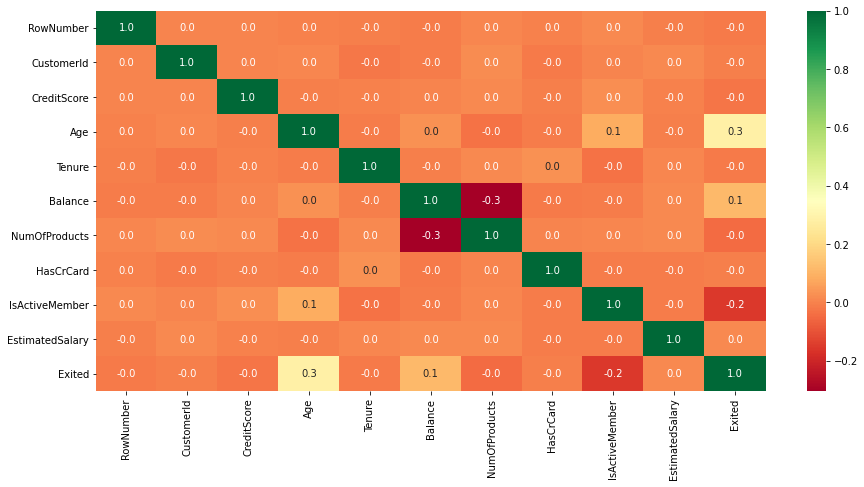

In [5]:
# Корреляция параметров
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap='RdYlGn');

Коэффициенты Пирсона менее 0.5, корреляция отсутствует, данные удалять нет необходимости.

<div style="border:solid black 3px; padding: 10px">
<b> Выводы:</b>

- Некорректные название столбцов
- Есть пропуски. Нужно разобраться что с ними делать (заменять/удалять/не трогать)
- Необходимо провести проверку на дубликаты
- Корреляция в данных отсутствует

### Предобработка данных

In [6]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

/tmp/ipykernel_205/3846741158.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]


In [7]:
# Количество пропущенных значений
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

В столбце `tenure` (период сотруднечества с банком) 909 пропусков, что менее 10 % от датасета. Заполение медианой приведет к искажению данных, восстановить данные также не представляется возможным. Чтобы не терять данные предлогается заполнить пропуски случайным значением в диапазоне от 0 до 10.

In [8]:
data[data['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [9]:
#Распределение до замены пропусков
a = data['tenure'].value_counts()

In [10]:
#Замена пропусков на случайные числа из диапазона 0-10
data.loc[data['tenure'].isna(), 'tenure'] = data['tenure'].apply(lambda x: random.randint(0, 10))

In [11]:
#Распределение после замены пропусков
b = data['tenure'].value_counts()

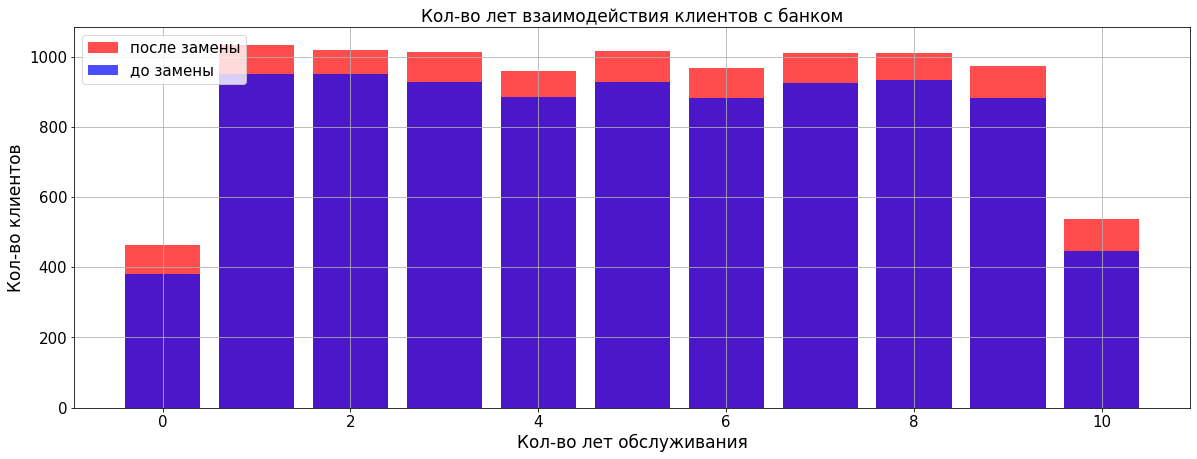

In [12]:
#Распределение после замены пропусков
plt.figure(figsize=(20, 7))
plt.bar(b.index, b, color='r', alpha=0.7, width=0.8, label='после замены')
plt.bar(a.index, a, color='b', alpha=0.7, width=0.8, label='до замены')
plt.xlabel('Кол-во лет обслуживания', fontsize=17)
plt.ylabel('Кол-во клиентов', fontsize=17)
plt.grid()
plt.title('Кол-во лет взаимодействия клиентов с банком', fontsize=17)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют

In [14]:
len(data['customer_id'].unique())

10000

В датасете присутствуют столбцы с лишней информацией, чтобы не перенагружать модель их следует удалить.

- row_number — столбец дублирует индекс
- customer_id — id пользователя, повторений в датасете нет, можно удалить.
- surname — категориальные данные, столбец не несет полезной информации для модели.

In [15]:
#удаление лишних столбцов
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

Для оценки целевого признака, проведем анализ датасета по различным признакам

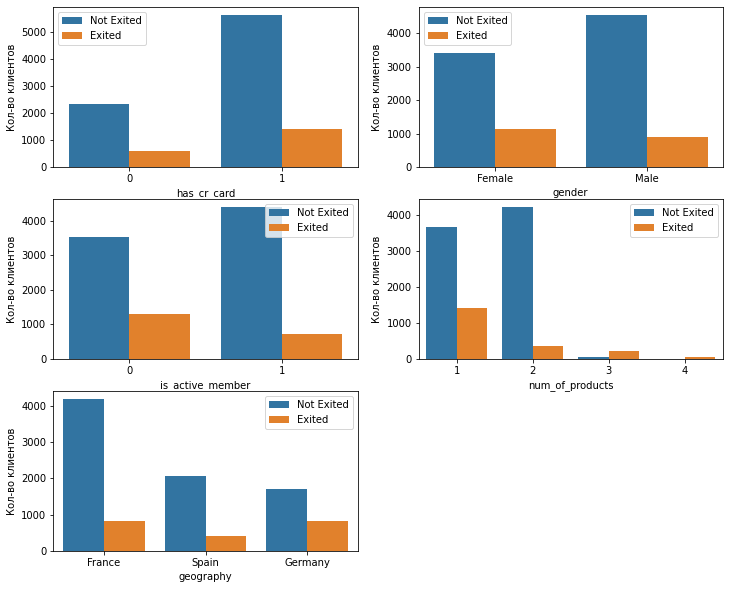

In [16]:
#Соотношение клиентов по различным признакам
plt.figure(figsize=(12,10))
columns = ['has_cr_card', 'gender', 'is_active_member', 'num_of_products', 'geography']
for i in range(5):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=columns[i], hue='exited', data=data)
    plt.ylabel('Кол-во клиентов')
    plt.legend(["Not Exited", "Exited"])
plt.show()

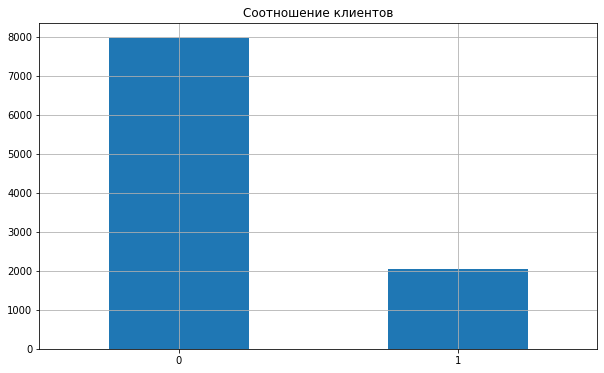

In [17]:
data['exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='Соотношение клиентов', rot='0');

In [18]:
#Проверка сбалансированности
data['exited'].value_counts(normalize=True)

0    0.8
1    0.2
Name: exited, dtype: float64

Такое распределение говорит, что присутствует дисбаланс в целевом признаке. Соотношение очень несбалансировано: 0 ~ 80% и 1 ~ 20%. Далее проведем исследование моделей без учета дисбаланса классов.

### One-Hot Encoding

Преобразуем категориальные признаки в численные техникой прямого кодирования One-Hot Encoding.

In [19]:
# кодирование признаков ohe
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим датасет на 3 выборки : обучающую, валидационную и тестовую с соотношением 60:20:20.

In [20]:
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)

# Разделение датасета на обучающую, валидационную и тестовую выборки
features_train, features_test_valid, target_train, target_test_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [21]:
#разделение данных на тестовую и валидационную
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test_valid, target_test_valid, test_size=0.5, random_state=12345)

Проверка разделения выборок

In [22]:
display(target_train.value_counts(normalize=True))
target_test_valid.value_counts(normalize=True)

0    0.8
1    0.2
Name: exited, dtype: float64

0    0.79
1    0.21
Name: exited, dtype: float64

In [23]:
display(target_valid.value_counts(normalize=True))
target_test.value_counts(normalize=True)

0    0.79
1    0.21
Name: exited, dtype: float64

0    0.79
1    0.21
Name: exited, dtype: float64

In [24]:
part_data_train = target_train.shape[0] / data_ohe.shape[0]
part_data_valid = target_valid.shape[0] / data_ohe.shape[0]
part_data_test = target_test.shape[0] / data_ohe.shape[0]
print(f'Доля тренировочного датасета составляет {part_data_train:.01%}') 
print(f'Доля валидационного датасета составляет {part_data_valid:.01%}') 
print(f'Доля тестового датасета составляет {part_data_test:.01%}') 

Доля тренировочного датасета составляет 60.0%
Доля валидационного датасета составляет 20.0%
Доля тестового датасета составляет 20.0%


Чтобы избежать ловушки масштабирования приведем признаки к одному масштабу.

In [25]:
numeric=['credit_score','age','tenure','balance', 'num_of_products', 'estimated_salary']

#Масштабирование признаков выборок
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

In [26]:
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.89,-0.37,1.02,1.23,-0.89,1,0,-0.19,0,1,1
3411,0.61,-0.18,1.02,0.60,-0.89,0,0,-0.33,0,0,0
6027,2.05,0.48,-0.70,1.03,0.83,0,1,1.50,1,0,1
1247,-1.46,-1.42,0.33,-1.23,0.83,1,0,-1.07,0,0,1
3716,0.13,-1.13,-1.04,1.14,-0.89,0,0,1.52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.07,-0.75,-0.35,-1.23,0.83,0,1,-1.28,0,0,1
4094,-1.45,-0.94,1.71,-1.23,0.83,0,1,-1.28,0,0,1
3492,0.03,0.58,-1.04,-0.31,-0.89,0,1,-0.90,0,0,0
2177,0.15,-1.42,-0.35,-1.23,0.83,0,1,-1.13,0,0,0


## Исследование задачи

Для обучения используем три модели:
- **LogisticRegression**
- **DecisionTreeClassifier**
- **RandomForestClassifier**


In [27]:
#Функция вывода метрик 
def print_metrics(target_valid, prediction):
    Accuracy_result = accuracy_score(target_valid, prediction)
    Recall_result = recall_score(target_valid, prediction)
    Precision_result = precision_score(target_valid, prediction)
    F1_result = f1_score(target_valid, prediction)
    AUC_ROC_result = roc_auc_score(target_valid, prediction)
           
    print(f'Accuracy: {Accuracy_result:.01%}')
    print(f'Recall: {Recall_result:.01%}')
    print(f'Precision: {Precision_result:.01%}')
    print(f'F1: {F1_result:.01%}')

### Модель Logistic Regression

In [28]:
logistic_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)

logistic_model.fit(features_train, target_train)# обучение модели

logistic_predictions_valid = logistic_model.predict(features_valid)# предсказания модели
   
# качество модели 
print_metrics(target_valid, logistic_predictions_valid)

Accuracy: 80.2%
Recall: 23.4%
Precision: 56.6%
F1: 33.2%


### Модель DecisionTreeClassifier

In [29]:
best_tree_model = None
best_tree_result = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    tree_model.fit(features_train, target_train)# обучение модели
      
    tree_predictions_valid = tree_model.predict(features_valid)# предсказания модели
    
    tree_result = f1_score(target_valid, tree_predictions_valid) # качество модели 
        
    if tree_result > best_tree_result:
        best_tree_model = tree_model
        best_tree_result = tree_result
        depth_tree = depth
        best_tree_predictions_valid = best_tree_model.predict(features_valid)

print_metrics(target_valid, best_tree_predictions_valid)
print(f'Глубина дерева: {depth_tree}')

Accuracy: 84.8%
Recall: 48.3%
Precision: 69.7%
F1: 57.1%
Глубина дерева: 9


### Random Forest Classifier

In [30]:
best_forest_model = None
best_forest_result = 0

for est in range(10, 51, 10):
    for depth in range (1, 12):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #обучение модели с заданным количеством деревьев
        forest_model.fit(features_train, target_train)# обучение модели
    
        forest_predictions_valid = forest_model.predict(features_valid)# предсказания модели
        
        forest_result = f1_score(target_valid, forest_predictions_valid) # качество модели 
                          
        if forest_result > best_forest_result:
            best_forest_model = forest_model
            best_forest_result = forest_result
            forest_depth_tree = depth
            forest_est = est      
            best_forest_predictions_valid = best_forest_model.predict(features_valid)
        
print(f'Кол-во деревьев: {forest_est}')        
print(f'Глубина дерева: {forest_depth_tree}')   

print_metrics(target_valid, best_forest_predictions_valid)

Кол-во деревьев: 20
Глубина дерева: 10
Accuracy: 86.4%
Recall: 45.0%
Precision: 81.4%
F1: 57.9%


## Борьба с дисбалансом

### Взвешивание классов

Придадим объектам редкого класса больший вес используем `class_weight='balanced'`.

#### Модель Logistic Regression

In [31]:
logistic_model = LogisticRegression(class_weight='balanced', random_state=12345, solver='liblinear', max_iter=1000)

logistic_model.fit(features_train, target_train)# обучение модели

logistic_predictions_valid_balanced = logistic_model.predict(features_valid)# предсказания модели
   
# качество модели 
print_metrics(target_valid, logistic_predictions_valid_balanced)

Accuracy: 70.0%
Recall: 67.9%
Precision: 37.9%
F1: 48.6%


#### Модель DecisionTreeClassifier

In [32]:
best_tree_model = None
best_tree_result = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    tree_model.fit(features_train, target_train)# обучение модели
      
    tree_predictions_valid = tree_model.predict(features_valid)# предсказания модели
    
    tree_result = f1_score(target_valid, tree_predictions_valid) # качество модели 
        
    if tree_result > best_tree_result:
        best_tree_model = tree_model
        best_tree_result = tree_result
        depth_tree = depth
        best_tree_predictions_valid_balanced = best_tree_model.predict(features_valid)

print(f'Глубина дерева: {depth_tree}')

print_metrics(target_valid, best_tree_predictions_valid_balanced)

Глубина дерева: 5
Accuracy: 81.0%
Recall: 67.0%
Precision: 53.6%
F1: 59.6%


#### Random Forest Classifier

In [33]:
best_forest_model = None
best_forest_result = 0

for est in range(10, 51, 10):
    for depth in range (1, 12):
        forest_model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est, max_depth=depth) #обучение модели с заданным количеством деревьев
        forest_model.fit(features_train, target_train)# обучение модели
    
        forest_predictions_valid = forest_model.predict(features_valid)# предсказания модели
        
        forest_result = f1_score(target_valid, forest_predictions_valid) # качество модели 
                          
        if forest_result > best_forest_result:
            best_forest_model = forest_model
            best_forest_result = forest_result
            forest_depth_tree = depth
            forest_est = est      
            best_forest_predictions_valid_balanced = best_forest_model.predict(features_valid)
        
print(f'Кол-во деревьев: {forest_est}')        
print(f'Глубина дерева: {forest_depth_tree}')   

print_metrics(target_valid, best_forest_predictions_valid_balanced)

Кол-во деревьев: 50
Глубина дерева: 9
Accuracy: 83.8%
Recall: 65.3%
Precision: 60.4%
F1: 62.8%


In [34]:
#матрица ошибок
confusion_matrix(target_test, forest_predictions_valid)

array([[1278,  299],
       [ 340,   83]])

In [35]:
forest_predictions_valid.sum()

382

### Увеличение выборки (upsampling) 

Увеличим объекты редкого класса и переобучим модели.

In [36]:
def upsample(features, target, repeat=10):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [37]:
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=4)

In [38]:
#проверка масшатирования
print(target_upsampled.value_counts(normalize = 1))

0    0.5
1    0.5
Name: exited, dtype: float64


#### Модель Logistic Regression

In [39]:
logistic_model_upsam = LogisticRegression(solver='liblinear', random_state=12345)
logistic_model_upsam.fit(features_upsampled, target_upsampled)

logistic_predictions_valid_upsam = logistic_model_upsam.predict(features_valid)

print_metrics(target_valid, logistic_predictions_valid_upsam)

Accuracy: 70.0%
Recall: 67.9%
Precision: 37.9%
F1: 48.6%


#### Модель DecisionTreeClassifier

In [40]:
best_tree_model_upsam = None
best_tree_result_upsam = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    tree_model.fit(features_upsampled, target_upsampled)# обучение модели
      
    tree_predictions_valid = tree_model.predict(features_valid)# предсказания модели
    
    tree_result = f1_score(target_valid, tree_predictions_valid) # качество модели 
        
    if tree_result > best_tree_result_upsam:
        best_tree_model_upsam = tree_model
        best_tree_result_upsam = tree_result
        depth_tree_upsam = depth
        best_tree_predictions_valid_upsam = tree_model.predict(features_valid)
        
print(f'Глубина дерева: {depth_tree_upsam}')

print_metrics(target_valid, best_tree_predictions_valid_upsam)

Глубина дерева: 5
Accuracy: 81.0%
Recall: 67.0%
Precision: 53.6%
F1: 59.6%


#### Random Forest Classifier

In [41]:
best_forest_model_upsam = None
best_forest_result_upsam = 0

for est in range(10, 101, 10):
    for depth in range (1, 11):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #обучение модели с заданным количеством деревьев
        forest_model.fit(features_upsampled, target_upsampled)# обучение модели
    
        forest_predictions_valid = forest_model.predict(features_valid)# предсказания модели
        
        forest_result = f1_score(target_valid, forest_predictions_valid) # качество модели 
                          
        if forest_result > best_forest_result_upsam:
            best_forest_model_upsam = forest_model
            best_forest_result_upsam = forest_result
            forest_depth_tree_upsam = depth
            forest_est_upsam = est      
            best_forest_predictions_valid_upsam = forest_model.predict(features_valid)       

print(f'Кол-во деревьев: {forest_est_upsam}')        
print(f'Глубина дерева: {forest_depth_tree_upsam}')   

print_metrics(target_valid, best_forest_predictions_valid_upsam)

Кол-во деревьев: 80
Глубина дерева: 10
Accuracy: 83.0%
Recall: 68.2%
Precision: 57.9%
F1: 62.6%


### Уменьшение  выборки (downsampling) 

Уменьшеним кол-во нулей

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_zeros = features_zeros.sample(frac=fraction, random_state=12345)
    target_zeros = target_zeros.sample(frac=fraction, random_state=12345)
    
    features_downsampled = pd.concat([features_zeros] + [features_ones])
    target_downsampled = pd.concat([target_zeros] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [43]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [44]:
#проверка масшатирования
print(target_downsampled.value_counts())

0    1201
1    1196
Name: exited, dtype: int64


#### Модель Logistic Regression

In [45]:
logistic_model_down = LogisticRegression(solver='liblinear', random_state=12345)
logistic_model_down.fit(features_downsampled, target_downsampled)

logistic_predictions_valid_down = logistic_model_down.predict(features_valid)

print_metrics(target_valid, logistic_predictions_valid_down)

Accuracy: 70.0%
Recall: 66.5%
Precision: 37.6%
F1: 48.1%


#### Модель DecisionTreeClassifier

In [46]:
best_tree_model_down = None
best_tree_result_down = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучение модели с заданной глубиной дерева
    tree_model.fit(features_downsampled, target_downsampled)# обучение модели
      
    tree_predictions_valid = tree_model.predict(features_valid)# предсказания модели
    
    tree_result = f1_score(target_valid, tree_predictions_valid) # качество модели 
        
    if tree_result > best_tree_result_down:
        best_tree_model_down = tree_model
        best_tree_result_down = tree_result
        depth_tree_down = depth
        best_tree_predictions_valid_down = tree_model.predict(features_valid)
        
print(f'Глубина дерева: {depth_tree}')

print_metrics(target_valid, best_tree_predictions_valid_down)

Глубина дерева: 5
Accuracy: 79.9%
Recall: 70.1%
Precision: 51.4%
F1: 59.3%


#### Random Forest Classifier

In [47]:
best_forest_model_down = None
best_forest_result_down = 0

for est in range(10, 151, 10):
    for depth in range (1, 11):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) #обучение модели с заданным количеством деревьев
        forest_model.fit(features_downsampled, target_downsampled)# обучение модели
    
        forest_predictions_valid = forest_model.predict(features_valid)# предсказания модели
        
        forest_result = f1_score(target_valid, forest_predictions_valid) # качество модели 
                          
        if forest_result > best_forest_result_down:
            best_forest_model_down = forest_model
            best_forest_result_down = forest_result
            forest_depth_tree_down = depth
            forest_est_down = est      
            best_forest_predictions_valid_down = forest_model.predict(features_valid)       
            
print(f'Кол-во деревьев: {forest_est_down}')        
print(f'Глубина дерева: {forest_depth_tree_down}')   

print_metrics(target_valid, best_forest_predictions_valid_down)

Кол-во деревьев: 10
Глубина дерева: 4
Accuracy: 80.5%
Recall: 72.2%
Precision: 52.3%
F1: 60.7%


Результирующая таблица

In [48]:
result = {'Дерево Решения':np.array([f1_score(target_valid, best_tree_predictions_valid),
                                              f1_score(target_valid, best_tree_predictions_valid_balanced),
                                              f1_score(target_valid, best_tree_predictions_valid_upsam),
                                              f1_score(target_valid, best_tree_predictions_valid_down)]),
          'Случайный лес':np.array([f1_score(target_valid, best_forest_predictions_valid),
                                              f1_score(target_valid, best_forest_predictions_valid),
                                              f1_score(target_valid, best_forest_predictions_valid_upsam),
                                              f1_score(target_valid, best_forest_predictions_valid_down)]),
          'Логистическая регрессия':np.array([f1_score(target_valid, logistic_predictions_valid),
                                              f1_score(target_valid, logistic_predictions_valid_balanced),
                                              f1_score(target_valid, logistic_predictions_valid_upsam),
                                              f1_score(target_valid, logistic_predictions_valid_down)])
         } 
result_df=pd.DataFrame(result, index=['Без учета баланса', 'Взвешивание классов', 'Увеличение выборки', 'Уменьшение выборки'])

In [49]:
result_df

,Дерево Решения,Случайный лес,Логистическая регрессия
Без учета баланса,0.57,0.58,0.33
Взвешивание классов,0.60,0.58,0.49
Увеличение выборки,0.60,0.63,0.49
Уменьшение выборки,0.59,0.61,0.48


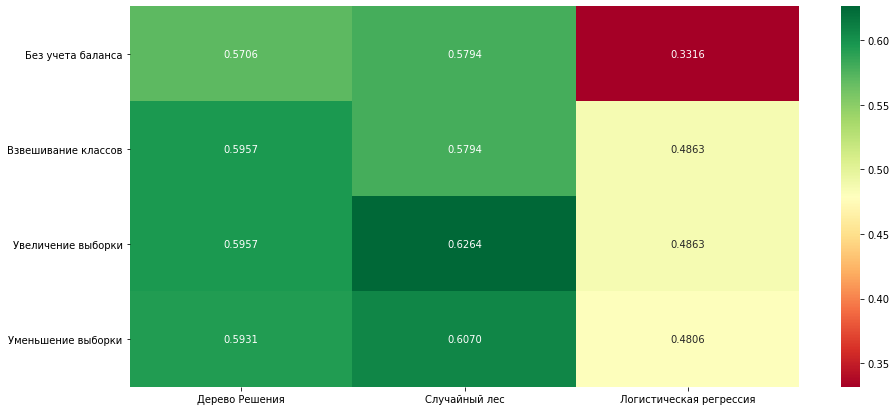

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(result_df, annot=True, fmt=".4f", cmap='RdYlGn');

### Исследование метрики AUC-ROC

Расчитаем метрику AUC-ROC для лучших результатов всех моделей

**Модель Logistic Regression**

In [51]:
probabilities_valid_log = logistic_model_down.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_valid_log[:, 1]

fpr_log, tpr_log, thresholds = roc_curve(target_valid, probabilities_one_valid_log)

roc_auc_score(target_valid, probabilities_one_valid_log)

0.7610589224469057

**Модель DecisionTreeClassifier**

In [52]:
probabilities_valid_tree = best_tree_model.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)

roc_auc_score(target_valid, probabilities_one_valid_tree)

0.8317918690531638

**Модель Random Forest Classifier**

In [53]:
probabilities_valid_forest = best_forest_model_upsam.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)

roc_auc_score(target_valid, probabilities_one_valid_forest)

0.8514916615754994

<Figure size 432x288 with 0 Axes>

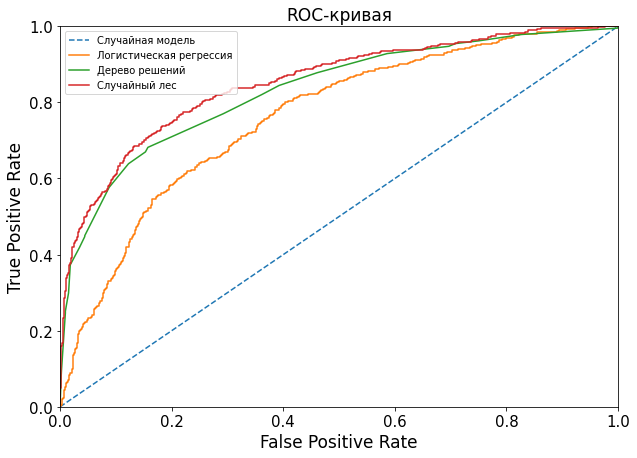

In [54]:
plt.figure()

plt.figure(figsize=(10,7))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# ROC-кривые моделей
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)

plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.title('ROC-кривая', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(('Случайная модель', 'Логистическая регрессия', 'Дерево решений', 'Случайный лес'), loc= 'upper left') 
plt.show()

Лучшее значение метрики auc_roc у модели Случайный лес

## Тестирование моделей

Пришло время проверить результаты работы алгоритмов классификации на тестовой выборке. Посмотрим метрики для лучших моделей.

**Модель Logistic Regression**

In [55]:
logistic_regression_test = logistic_model_down.predict(features_test)
logistic_regression_result = round(roc_auc_score(target_test, logistic_regression_test), 2)

print_metrics(target_test, logistic_regression_test)
print(f'AUC-ROC: {logistic_regression_result}') 

Accuracy: 70.0%
Recall: 67.4%
Precision: 38.1%
F1: 48.7%
AUC-ROC: 0.69


**Модель DecisionTreeClassifier**

In [56]:
tree_predictions_test = best_tree_model.predict(features_test)
tree_predictions_result = round(roc_auc_score(target_test, tree_predictions_test), 2)

print_metrics(target_test, tree_predictions_test)
print(f'AUC-ROC: {tree_predictions_result}') 

Accuracy: 79.9%
Recall: 66.4%
Precision: 51.9%
F1: 58.3%
AUC-ROC: 0.75


**Модель Random Forest Classifier**

In [57]:
forest_predictions_test = best_forest_model.predict(features_test)
forest_predictions_result = round(roc_auc_score(target_test, forest_predictions_test), 2)

print_metrics(target_test, forest_predictions_test)
print(f'AUC-ROC: {forest_predictions_result}') 

Accuracy: 83.0%
Recall: 64.5%
Precision: 59.0%
F1: 61.6%
AUC-ROC: 0.76


## Вывод

<div style="border:solid black 3px; padding: 10px">
    
    В данных наблюдался значительный дисбаланс (80% на 20%). Все модели характеризовались высокой степенью точности и низким качеством F1 меры.
    
    Рассматривая данные с учетом дисбаланса и без учета дисбаланса тремя моделями можно сделать вывод, что самая точная модель Случайный лес. При увеличении целевого признака методом upsampling, глубине деревьев 9 и кол-ве деревьев 80 значение F1 меры составило = 0,62 на валидной и 0,6 на тестовой выборках. Все модели после балансировки показывают более лучшие результаты метрики F1. Худший результат у модели Логистическая регрессия. 